## With Machine Learning Method

In [75]:
import pandas as pd

df = pd.read_csv("passengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [63]:
data = df.drop(['Month'], axis=1)
data.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [64]:
#lagged Function, just copas from 
#https://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
def LaggedFeatures(s,lag=2,fillna=True, dropna=False):
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print ('Only works for DataFrame or Series')
        return None
    if dropna:
        res = res.dropna()
    else:
        res = res
    if fillna:
        return res.fillna(0)
    else:
        return res 

In [65]:
lag1 = LaggedFeatures(data,lag=3,fillna=True, dropna=True)
lag1.shape

(141, 4)

In [66]:
train = lag1.iloc[:101]
test = lag1.iloc[101:]
train

,Passengers,Passengers_lag1,Passengers_lag2,Passengers_lag3
3,129,132.0,118.0,112.0
4,121,129.0,132.0,118.0
5,135,121.0,129.0,132.0
6,148,135.0,121.0,129.0
7,148,148.0,135.0,121.0
...,...,...,...,...
99,348,356.0,301.0,315.0
100,355,348.0,356.0,301.0
101,422,355.0,348.0,356.0
102,465,422.0,355.0,348.0


In [69]:
#create X and y

X_train = train.drop(['Passengers'], axis=1)
X_test = test.drop(['Passengers'], axis=1)

y_train = train['Passengers']
y_test = test ['Passengers']


X_train = X_train.astype(float).values
y_train = y_train.astype(float).values

X_test = X_test.astype(float).values
y_test = y_test.astype(float).values


In [70]:
#masukkan ke model regresi
from sklearn.svm import SVR #SVR
from sklearn.tree import DecisionTreeRegressor #decisiontreeregressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

svr = SVR()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
mlp = MLPRegressor()
lr = LinearRegression()
knn = KNeighborsRegressor()


#train
svr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [72]:
y_pred_svr = svr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)

print("SVR")
print("MSE: ",mean_squared_error(y_test,y_pred_svr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("R2: ",r2_score(y_test,y_pred_svr))
print("")

print("Decission Tree Regression")
print("MSE: ",mean_squared_error(y_test,y_pred_dt))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print("R2: ",r2_score(y_test,y_pred_dt))
print("")

print("Random Forest Regression")
print("MSE: ",mean_squared_error(y_test,y_pred_rf))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R2: ",r2_score(y_test,y_pred_rf))
print("")

print("MLP Regression")
print("MSE: ",mean_squared_error(y_test,y_pred_mlp))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_mlp)))
print("R2: ",r2_score(y_test,y_pred_mlp))
print("")

print("Linear Regression")
print("MSE: ",mean_squared_error(y_test,y_pred_lr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R2: ",r2_score(y_test,y_pred_lr))
print("")

print("KNN")
print("MSE: ",mean_squared_error(y_test,y_pred_knn))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print("R2: ",r2_score(y_test,y_pred_knn))
print("")

SVR
MSE:  43852.88402276194
RMSE:  209.41080206799728
R2:  -6.052630152114012

Decission Tree Regression
MSE:  4036.575
RMSE:  63.53404599110622
R2:  0.35081873882016534

Random Forest Regression
MSE:  3871.761985
RMSE:  62.223484192063694
R2:  0.3773247546718591

MLP Regression
MSE:  6111.142883022983
RMSE:  78.17379921062417
R2:  0.01717682836289891

Linear Regression
MSE:  2102.1685847764193
RMSE:  45.84941204395558
R2:  0.6619192129273496

KNN
MSE:  5969.379999999999
RMSE:  77.26176285848
R2:  0.03997581195402522



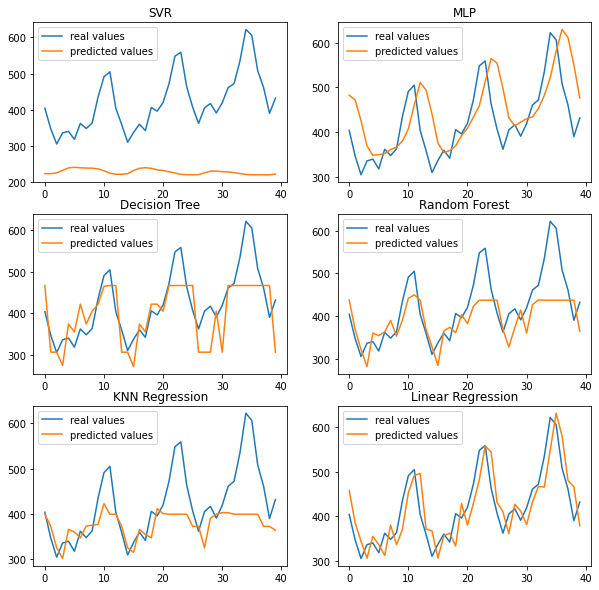

In [73]:
#Plot untuk melihat hasil
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(10,10)) 

axs[0, 0].plot(y_test[:100],label='real values')
axs[0, 0].plot(y_pred_svr[:100],label='predicted values')
axs[0, 0].set_title("SVR") 
axs[0, 0].legend()


axs[0, 1].plot(y_test[:100],label='real values')
axs[0, 1].plot(y_pred_mlp[:100],label='predicted values')
axs[0, 1].set_title("MLP")
axs[0, 1].legend()

axs[1, 0].plot(y_test[:100],label='real values')
axs[1, 0].plot(y_pred_dt[:100],label='predicted values')
axs[1, 0].set_title("Decision Tree")
axs[1, 0].legend()

axs[1, 1].plot(y_test[:100],label='real values')
axs[1, 1].plot(y_pred_rf[:100],label='predicted values')
axs[1, 1].set_title("Random Forest")
axs[1, 1].legend()

axs[2, 0].plot(y_test[:100],label='real values')
axs[2, 0].plot(y_pred_knn[:100],label='predicted values')
axs[2, 0].set_title("KNN Regression")
axs[2, 0].legend()

axs[2, 1].plot(y_test[:100],label='real values')
axs[2, 1].plot(y_pred_lr[:100],label='predicted values')
axs[2, 1].set_title("Linear Regression")
axs[2, 1].legend()


## With Statistical Method

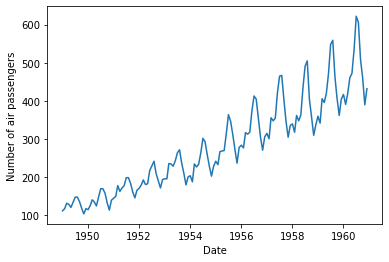

In [78]:
df = pd.read_csv('passengers.csv', parse_dates = ['Month'], index_col = ['Month'])
# df.head()
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)

## Moving Average and Exponential Smoothing

In [97]:
# Simple Moving Average

df_sma = df.copy()
df_sma = df_sma.reset_index()
df_sma['7-days-SMA'] = data['Passengers'].rolling(window=7).mean()
df_sma['15-days-SMA'] = data['Passengers'].rolling(window=15).mean()
df_sma.head(20)

,Month,Passengers,7-days-SMA,15-days-SMA
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,NaN,NaN
2,1949-03-01,132,NaN,NaN
3,1949-04-01,129,NaN,NaN
4,1949-05-01,121,NaN,NaN
5,1949-06-01,135,NaN,NaN
6,1949-07-01,148,127.857143,NaN
7,1949-08-01,148,133.000000,NaN
8,1949-09-01,136,135.571429,NaN
9,1949-10-01,119,133.714286,NaN


<AxesSubplot:xlabel='Month'>

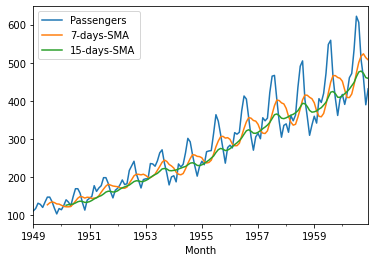

In [98]:
import matplotlib.pyplot as plt
df_sma = df_sma.set_index("Month")
df_sma.plot()

In [101]:
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df_ses = df.copy()
df_ses = df_ses.reset_index()

model_ses = SimpleExpSmoothing(data['Passengers'])
fitted_model_ses = model_ses.fit(smoothing_level=0.3,optimized=False,use_brute=True) # bisa masukin alpha
df_ses['SES_0.3'] = fitted_model_ses.fittedvalues

fitted_model_ses = model_ses.fit(smoothing_level=0.8,optimized=False,use_brute=True) # bisa masukin alpha
df_ses['SES_0.8'] = fitted_model_ses.fittedvalues

df_ses.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Month,Passengers,SES_0.3,SES_0.8
0,1949-01-01,112,112.000000,112.000000
1,1949-02-01,118,112.000000,112.000000
2,1949-03-01,132,113.800000,116.800000
3,1949-04-01,129,119.260000,128.960000
4,1949-05-01,121,122.182000,128.992000
5,1949-06-01,135,121.827400,122.598400
6,1949-07-01,148,125.779180,132.519680
7,1949-08-01,148,132.445426,144.903936
8,1949-09-01,136,137.111798,147.380787
9,1949-10-01,119,136.778259,138.276157


<AxesSubplot:xlabel='Month'>

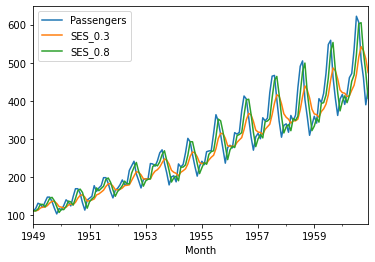

In [102]:
import matplotlib.pyplot as plt
df_ses = df_ses.set_index("Month")
df_ses.plot()

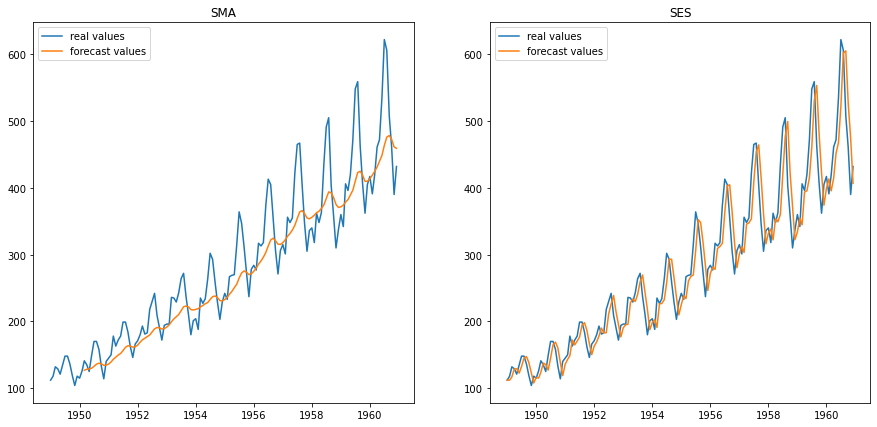

In [114]:
fig, axs = plt.subplots(1, 2, figsize=(15,7)) 


axs[0].plot(df_sma['Passengers'],label='real values')
axs[0].plot(df_sma['15-days-SMA'],label='forecast values')
axs[0].set_title("SMA") 
axs[0].legend()


axs[1].plot(df_ses['Passengers'],label='real values')
axs[1].plot(df_ses['SES_0.8'],label='forecast values')
axs[1].set_title("SES") 
axs[1].legend()


In [115]:
train_data = df.iloc[:109] # df.loc[:'1940-01-01']
test_data = df.iloc[108:]

In [117]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Passengers'],
                                   trend = 'add', # try mul
                                   seasonal = 'add', # try mul
                                   seasonal_periods = 12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [118]:
test_predictions = fitted_model.forecast(48)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

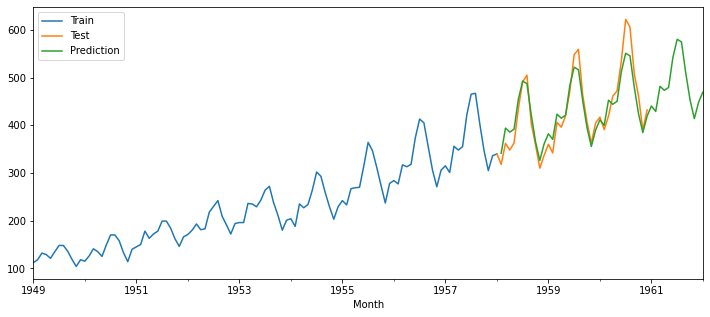

In [119]:
train_data['Passengers'].plot(legend=True, label = 'Train',
                             figsize = (12,5))
test_data['Passengers'].plot(legend=True, label = 'Test')
test_predictions.plot(legend=True, label = 'Prediction')

## ARIMA

In [120]:
start=len(train)
end=len(train)+len(test)-1

In [123]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Passengers'],order=(1,1,1)) # (p -> AR, d -> I (stationarity) , q -> MA)
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:>

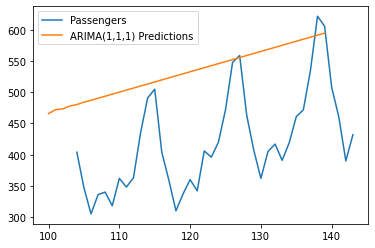

In [124]:
# predictions
predictions=results.predict(start,end,typ='levels').rename('ARIMA(1,1,1) Predictions')

test['Passengers'].plot(legend=True)
predictions.plot(legend=True)

## SARIMA

In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train['Passengers'],order=(1,1,1),seasonal_order=(1,0,0,12))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [126]:
predictions1=results.predict(start,end,typ='levels').rename('SARIMA Predictions')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:>

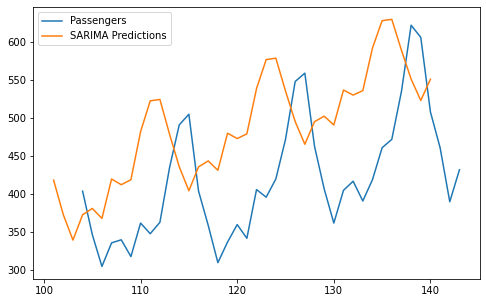

In [127]:
test['Passengers'].plot(legend=True,figsize=(8,5))
predictions1.plot(legend=True)

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

print("SARIMAX")
print("MAE: ",mean_absolute_error(test['Passengers'],predictions1))
print("MSE: ",mean_squared_error(test['Passengers'],predictions1))
print("RMSE: ", np.sqrt(mean_squared_error(test['Passengers'],predictions1)))
print("R2: ",r2_score(test['Passengers'],predictions1))
print("")

SARIMAX
MAE:  65.61888564375076
MSE:  5253.014632340775
RMSE:  72.47768368498524
R2:  0.15518511014434022



In [130]:
model=SARIMAX(df['Passengers'],order=(1,1,1),seasonal_order=(1,0,0,12))
results=model.fit()
fcast=results.predict(start=len(df),end=len(df)+36,typ='levels').rename('SARIMA Forecast')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<AxesSubplot:xlabel='Month'>

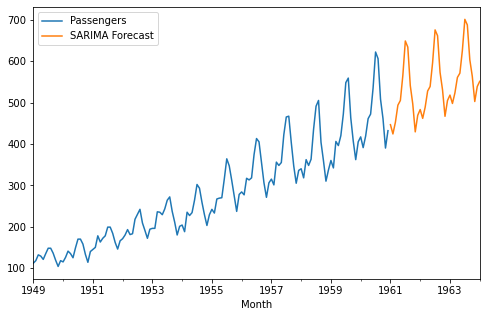

In [131]:
df['Passengers'].plot(legend=True,figsize=(8,5))
fcast.plot(legend=True)